In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [5]:
# import pyspark # beacause pyspark >>>> pandas
# from pyspark.sql.types import StructType,StructField, StringType, IntegerType, FloatType

In [6]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

### Load data

In [7]:
# from os import walk

# filenames = next(walk('./data'), (None, None, []))[2]  # [] if no file

In [8]:
# schema = StructType([
#   StructField('id'                             , IntegerType(), True),
#   StructField('origin'                         , StringType(), True),
#   StructField('destination'                    , StringType(), True),
#   StructField('algorithm'                      , StringType(), True),
#   StructField('battery'                        , FloatType(), True),
#   StructField('obstacles_qty'                  , StringType(), True),
#   StructField('distance'                       , StringType(), True),
#   StructField('time_to_plan'                   , StringType(), True),
#   StructField('distance_path'                  , StringType(), True),
#   StructField('ratio'                          , StringType(), True),
#   StructField('distance_to_objective'          , StringType(), True),
#   StructField('factibility'                    , StringType(), True),
#   StructField('qty_wp'                         , StringType(), True),
#   StructField('first_factible_route_found_time', StringType(), True),
#   StructField('exception'                      , StringType(), True)

#   ])

# df = spark.createDataFrame([], schema)

In [9]:
# for fn in filenames:
#     df = df.union(spark.read.option("header",True) .format("csv").load("./data/"+fn))

In [10]:
# df_ag_0 = pd.read_csv('./data/results_ag_mapa_0.csv', index_col=0)
# df_ag_1 = pd.read_csv('./data/results_ag_mapa_1.csv', index_col=0)
# df_rrt_0 = pd.read_csv('./data/results_rrt_mapa_0.csv', index_col=0)
# df_rrt_1 = pd.read_csv('./data/results_rrt_mapa_1.csv', index_col=0)
# df_pfp_0 = pd.read_csv('./data/results_pfp_mapa_0.csv', index_col=0)
# df_pfp_1 = pd.read_csv('./data/results_pfp_mapa_1.csv', index_col=0)

df_0 = pd.read_csv('./data/data_0.csv', index_col=0)
df_1 = pd.read_csv('./data/data_1.csv', index_col=0)
df_2 = pd.read_csv('./data/data_2.csv', index_col=0)
df_3 = pd.read_csv('./data/data_3.csv', index_col=0)

In [11]:
def concat_map_n(df, n):
    df['origin_destination'] = str(n) + '_' + df['origin'].astype(str) + '_' + df['destination'].astype(str)
    df['origin'] = str(n) + '_' + df['origin'].astype(str)
    df['destination'] = str(n) + '_' + df['destination'].astype(str)

In [12]:
# concat_map_n(df_ag_0, 0)
# concat_map_n(df_ag_1, 1)
# concat_map_n(df_rrt_0, 0)
# concat_map_n(df_rrt_1, 1)
# concat_map_n(df_pfp_0, 0)
# concat_map_n(df_pfp_1, 1)

concat_map_n(df_0, 0)
concat_map_n(df_1, 0)
concat_map_n(df_2, 0)
concat_map_n(df_3, 0)


In [13]:
# Pre-processing

# Concatenate all maps and algorithms into one df
# df = pd.concat([df_ag_0, df_ag_1, df_rrt_0, df_rrt_1, df_pfp_0, df_pfp_1], ignore_index=True)
df = pd.concat([df_0, df_1, df_2, df_3], ignore_index=True)

# Drop unused columns
df = df.drop(['first_factible_route_found_time', 'exception'], axis=1)

# Put last column in the first position
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

df.sample(10)

,origin_destination,origin,destination,algorithm,distance_straight_line,obst_qty,time_to_plan,d_path,ratio,distance_to_objective,factibility,qty_wp,battery
8404,0_region_11_region_7,0_region_11,0_region_7,ag,1.441,0,8.866,1470.915,1020.868,0.000,feasible,6,15
12551,0_base_3_region_12,0_base_3,0_region_12,pfp,2.260,0,16.442,2347.081,1038.307,652.358,verify,89,10
8033,0_region_10_region_2,0_region_10,0_region_2,rrt,2.547,0,0.832,2975.757,1168.282,0.000,feasible,121,10
2308,0_region_4_region_1,0_region_4,0_region_1,rrt,0.382,0,0.034,390.746,1023.595,0.000,feasible,17,15
8554,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.000,feasible,94,15
1085,0_base_4_region_1,0_base_4,0_region_1,rrt,2.993,0,0.046,3296.431,1101.323,0.000,feasible,133,10
8940,0_region_2_region_8,0_region_2,0_region_8,pfp,1.537,0,2.895,1602.257,1042.629,593.011,verify,77,100
6614,0_region_4_base_2,0_region_4,0_base_2,pfp,3.715,0,2.862,3720.687,1001.594,427.845,verify,186,50
5101,0_region_4_region_1,0_region_4,0_region_1,pfp,0.382,0,6.279,394.708,1033.976,913.629,verify,16,75
6388,0_region_3_base_4,0_region_3,0_base_4,ag,2.024,0,12.197,2125.562,1050.249,0.000,feasible,7,15


In [14]:
# Pre-processing

# Concatenate all maps and algorithms into one df
# df = pd.concat([df_ag_0, df_ag_1, df_rrt_0, df_rrt_1, df_pfp_0, df_pfp_1], ignore_index=True)
df = pd.concat([df_0, df_1, df_2, df_3], ignore_index=True)

# Drop unused columns
df = df.drop(['first_factible_route_found_time', 'exception'], axis=1)

# Put last column in the first position
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

df.sample(10)

,origin_destination,origin,destination,algorithm,distance_straight_line,obst_qty,time_to_plan,d_path,ratio,distance_to_objective,factibility,qty_wp,battery
5572,0_region_6_region_5,0_region_6,0_region_5,pfp,0.075,0,3.716,82.365,1101.689,321.699,verify,4,15
13674,0_base_3_region_5,0_base_3,0_region_5,rrt,0.115,0,0.009,117.712,1022.657,0.000,feasible,6,100
5194,0_region_5_region_3,0_region_5,0_region_3,pfp,0.272,0,4.141,286.330,1053.769,739.406,verify,14,15
5671,0_region_1_region_7,0_region_1,0_region_7,rrt,3.088,0,0.058,3336.786,1080.664,0.000,feasible,135,75
10753,0_region_9_region_3,0_region_9,0_region_3,rrt,2.148,0,0.041,2449.428,1140.110,0.000,feasible,99,75
7200,0_region_7_region_1,0_region_7,0_region_1,rrt,3.088,0,0.335,3697.829,1197.593,0.000,feasible,149,100
10451,0_region_8_region_1,0_region_8,0_region_1,rrt,2.077,0,0.090,2274.837,1095.045,0.000,feasible,92,10
3082,0_base_1_region_2,0_base_1,0_region_2,rrt,2.183,0,0.031,2394.420,1096.799,0.000,feasible,97,15
11975,0_base_1_region_10,0_base_1,0_region_10,pfp,1.273,0,4.421,1377.236,1081.502,637.490,verify,59,10
9845,0_region_5_base_1,0_region_5,0_base_1,pfp,2.603,0,17.460,2816.548,1081.940,1373.182,verify,121,10


----

### Pre-Processing

In [15]:
# Add battery values

# grouped = df.groupby(['origin','destination'])

# batteries = [25,50,75,100]

# df_aux = pd.DataFrame()

# # colocar o vetor e dar explode?
# for _, frame in grouped:
    
#     frame_aux = frame.copy()
#     for battery in batteries:
#         frame_aux['battery'] = battery
#         frame = pd.concat([frame, frame_aux])
    
#     df_aux = pd.concat([df_aux, frame])
#     df_aux = df_aux.dropna(subset=['battery'])

df_aux = df.drop_duplicates()

In [16]:
df_aux

,origin_destination,origin,destination,algorithm,distance_straight_line,obst_qty,time_to_plan,d_path,ratio,distance_to_objective,factibility,qty_wp,battery
0,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,100
1,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,75
2,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,50
3,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,25
4,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,75
8552,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,50
8553,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,25
8554,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,15


In [17]:
df_aux

,origin_destination,origin,destination,algorithm,distance_straight_line,obst_qty,time_to_plan,d_path,ratio,distance_to_objective,factibility,qty_wp,battery
0,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,100
1,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,75
2,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,50
3,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,25
4,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.055,2335.699,1161.123,0.0,feasible,95,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,75
8552,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,50
8553,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,25
8554,0_region_12_region_1,0_region_12,0_region_1,rrt,2.012,0,0.040,2316.242,1151.451,0.0,feasible,94,15


In [18]:
# Calculate gain function

grouped = df_aux.groupby(['origin','destination','battery'])

df_results = pd.DataFrame()



In [19]:
type(df_results)

pandas.core.frame.DataFrame

In [20]:
for _, frame in grouped:
    frame
    
    # Calculate terms
    terms = pd.DataFrame()
    terms['T1'] = np.multiply(frame['battery'], frame['ratio'])
#     terms['T1'] = frame['battery']
    terms['T2'] = frame['time_to_plan']
    terms['T3'] = frame['ratio']
    terms['T4'] = frame['distance_to_objective']
    terms['T5'] = frame['qty_wp']
    terms_normalized=(terms-terms.min())/(terms.max()-terms.min())
    
    terms_normalized['F'] = terms_normalized.sum(axis=1)
    
    # Select minimum F
    idx = terms_normalized[['F']].idxmin()
    idx = idx['F']
    best = frame.loc[idx]
        
    df_results = df_results.append(best)
    
#     df_results.loc[idx]['F'] = terms_normalized.loc[idx]['F']
    
#     break

In [21]:
df_results.algorithm.value_counts()

ag     870
rrt    480
pfp     90
Name: algorithm, dtype: int64

In [22]:
df_results.algorithm.value_counts(normalize=True)

ag     0.604
rrt    0.333
pfp    0.062
Name: algorithm, dtype: float64

In [23]:
df_results.algorithm.value_counts()

ag     870
rrt    480
pfp     90
Name: algorithm, dtype: int64

In [24]:
df_results.algorithm.value_counts(normalize=True)

ag     0.604
rrt    0.333
pfp    0.062
Name: algorithm, dtype: float64

---
# Train KNN

In [22]:
df_results

,algorithm,battery,d_path,destination,distance_straight_line,distance_to_objective,factibility,obst_qty,origin,origin_destination,qty_wp,ratio,time_to_plan
1907,ag,10.0,30.076,0_base_2,0.039,0.0,feasible,0.0,0_base_1,0_base_1_base_2,6.0,775.364,0.733
1906,ag,15.0,30.076,0_base_2,0.039,0.0,feasible,0.0,0_base_1,0_base_1_base_2,6.0,775.364,0.733
1905,ag,25.0,30.076,0_base_2,0.039,0.0,feasible,0.0,0_base_1,0_base_1_base_2,6.0,775.364,0.733
1904,ag,50.0,30.076,0_base_2,0.039,0.0,feasible,0.0,0_base_1,0_base_1_base_2,6.0,775.364,0.733
1903,ag,75.0,30.076,0_base_2,0.039,0.0,feasible,0.0,0_base_1,0_base_1_base_2,6.0,775.364,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,ag,15.0,11.259,0_region_8,0.021,0.0,feasible,0.0,0_region_9,0_region_9_region_8,6.0,532.070,0.216
7881,ag,25.0,11.259,0_region_8,0.021,0.0,feasible,0.0,0_region_9,0_region_9_region_8,6.0,532.070,0.216
7880,ag,50.0,11.259,0_region_8,0.021,0.0,feasible,0.0,0_region_9,0_region_9_region_8,6.0,532.070,0.216
7879,ag,75.0,11.259,0_region_8,0.021,0.0,feasible,0.0,0_region_9,0_region_9_region_8,6.0,532.070,0.216


In [30]:
features = df_results[['obst_qty', 'distance_straight_line', 'battery']]
labels = df_results['algorithm']

In [43]:
features

,obst_qty,distance_straight_line,battery
1907,0.0,0.039,10.0
1906,0.0,0.039,15.0
1905,0.0,0.039,25.0
1904,0.0,0.039,50.0
1903,0.0,0.039,75.0
...,...,...,...
7882,0.0,0.021,15.0
7881,0.0,0.021,25.0
7880,0.0,0.021,50.0
7879,0.0,0.021,75.0


In [27]:
le = preprocessing.LabelEncoder()

In [28]:
labels_encoded = le.fit_transform(labels)

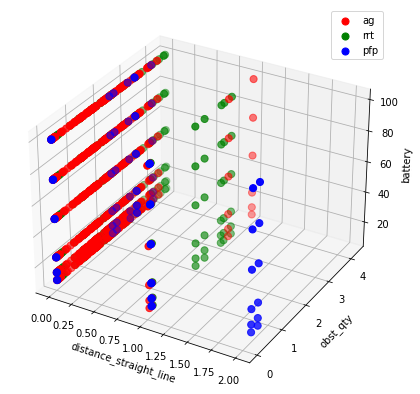

In [97]:


# Assuming you've provided features and labels earlier in your code
X = features.values
y = labels.values

# Train kNN classifier
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X, y)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for the labels
color_map = {
    'ag': 'r',
    'rrt': 'g',
    'pfp': 'b'
}

# Plot data points for each label
for label, color in color_map.items():
    ax.scatter(X[y==label][:, 0], X[y==label][:, 1], X[y==label][:, 2], c=color, s=50, label=label)

ax.set_xlabel('distance_straight_line')
ax.set_ylabel('obst_qty')
ax.set_zlabel('battery')
ax.legend()
plt.show()


In [117]:
# planners={'rrt':0, 'ag':0, 'pfp':0}
planners = []
for i in range(0, 5):
    for j in range(1, 20):
        for k in range(1, 100):
#             planners[clf.predict([[i,j/10,k]])[0]] +=1
            result =  clf.predict([[i,float(j)/10.0,k]])[0]
            planners.append((i, j, k,result))
            
# print(planners)
# {'rrt': 3577, 'ag': 4235, 'pfp': 1593} 15

In [116]:
20/10

2.0

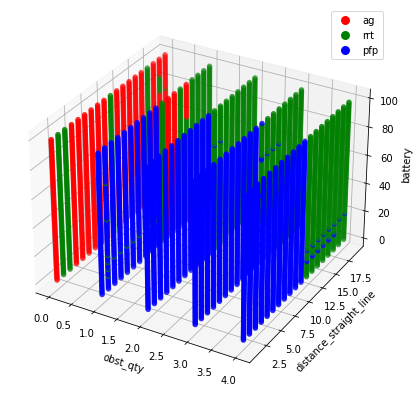

In [119]:
# Extracting data for plotting
xs, ys, zs, colors = zip(*planners)

# Map the result to a color
color_map = {
    'ag': 'r',
    'rrt': 'g',
    'pfp': 'b'  # Add other categories if you have more
}
colors = [color_map[color] for color in colors]

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=colors, marker='o')

ax.set_ylabel('distance_straight_line')
ax.set_xlabel('obst_qty')
ax.set_zlabel('battery')

# Creating custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[key], markersize=10, label=key) for key in color_map]
ax.legend(handles=legend_elements)

plt.show()

In [88]:
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Distance metrics to evaluate
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in metrics:
    clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric=metric)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{k} Accuracy with {metric} distance: {accuracy * 100:.2f}%")

99 Accuracy with euclidean distance: 57.29%
99 Accuracy with manhattan distance: 57.29%
99 Accuracy with chebyshev distance: 57.29%
99 Accuracy with minkowski distance: 57.29%


In [89]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter


# Train a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(features, labels)

# Example instances
example_instances = np.array([[0.0, 0.03, 15.0],  # Modify as per your needs
                              [0.0, 2.02, 20.0]])

# Find the nearest neighbors for the example instances
distances, indices = clf.kneighbors(example_instances)

# Print the nearest neighbors for each example instance
for i, instance in enumerate(example_instances):
    neighbor_labels = labels.values[indices[i]]
    label_counts = Counter(neighbor_labels)

    print(f"Nearest neighbors for instance {i + 1}:")
    for j, index in enumerate(indices[i]):
        print(f" Neighbor {j + 1}: {features.values[index]} with distance {distances[i][j]:.2f} and label {labels.values[index]}")
    
    print("\nLabel counts in the neighborhood:")
    for label, count in label_counts.items():
        print(f" {label}: {count}")

    print("\n")

Nearest neighbors for instance 1:
 Neighbor 1: [ 0.          0.02992417 15.        ] with distance 0.00 and label ag
 Neighbor 2: [ 0.          0.02992417 15.        ] with distance 0.00 and label pfp
 Neighbor 3: [ 0.          0.02592968 15.        ] with distance 0.00 and label ag
 Neighbor 4: [ 0.          0.03878992 15.        ] with distance 0.01 and label ag
 Neighbor 5: [ 0.          0.03878992 15.        ] with distance 0.01 and label ag

Label counts in the neighborhood:
 ag: 4
 pfp: 1


Nearest neighbors for instance 2:
 Neighbor 1: [ 0.          2.02386584 15.        ] with distance 5.00 and label ag
 Neighbor 2: [ 0.          2.02386584 25.        ] with distance 5.00 and label ag
 Neighbor 3: [ 0.          2.02386584 15.        ] with distance 5.00 and label ag
 Neighbor 4: [ 0.          2.02386584 25.        ] with distance 5.00 and label ag
 Neighbor 5: [ 0.          2.01158595 25.        ] with distance 5.00 and label ag

Label counts in the neighborhood:
 ag: 5




# Finding Best K

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

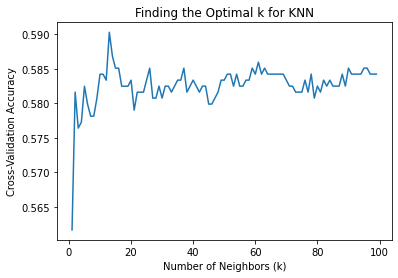

In [91]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Create a list of k values to test
k_values = list(range(1, 100))

# Perform cross-validation for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the results
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding the Optimal k for KNN')
plt.show()


In [43]:
# Create a parameter grid to search over
param_grid = {'n_neighbors': range(1, 100)}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=100)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/home/vannini/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 77 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
features.sample(5)

,obst_qty,distance_straight_line,battery
1006,0.0,1.055,15.0
7829,0.0,1.481,10.0
1717,2.0,0.321,75.0
7807,0.0,2.614,75.0
7933,0.0,0.834,75.0


In [26]:
labels.sample(5)

7428     ag
1182     ag
7413     ag
7905    rrt
8177    rrt
Name: algorithm, dtype: object

## 3D Scatter Plot

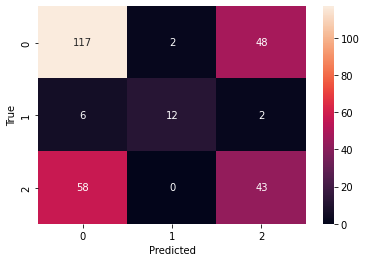

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X, y are your data and labels
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2)

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

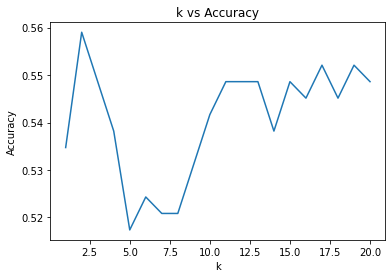

In [62]:
from sklearn.metrics import accuracy_score

# Varying k from 1 to a maximum value
max_k = 20
accuracies = []

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, max_k + 1), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

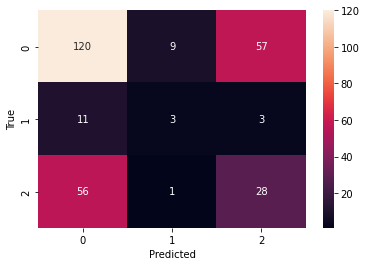

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X, y are your data and labels
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2)

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
knn.fit(features,labels)

KNeighborsClassifier()

In [52]:
knn

KNeighborsClassifier()

In [53]:
knn.predict([[1,500,25]])

array(['rrt'], dtype=object)

In [54]:
knn.predict([[4,518,50]])

array(['rrt'], dtype=object)

In [1]:
import pickle 

In [120]:
with open('knn5w.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [57]:


# Its important to use binary mode 
knnPickle = open('knn5w.pkl', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)                      


# load the model from disk
loaded_model = pickle.load(open('knn5', 'rb'))
result = loaded_model.predict([[1,550,100]]) 

In [58]:
result

array(['rrt'], dtype=object)

In [2]:
loaded_model = pickle.load(open('knn5w.pkl', 'rb'))
result = loaded_model.predict([[1,550,100]]) 

In [3]:
result

array(['rrt'], dtype=object)

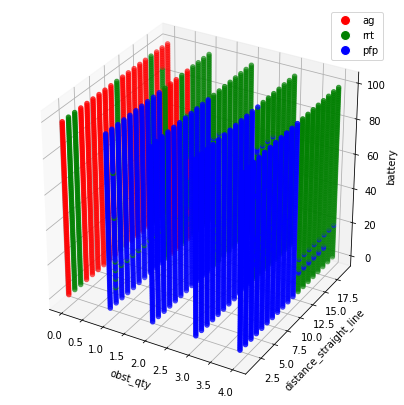

In [8]:
planners = []
for i in range(0, 5):
    for j in range(1, 20):
        for k in range(1, 100):
#             planners[clf.predict([[i,j/10,k]])[0]] +=1
            result =  loaded_model.predict([[i,float(j)/10.0,k]])[0]
            planners.append((i, j, k,result))


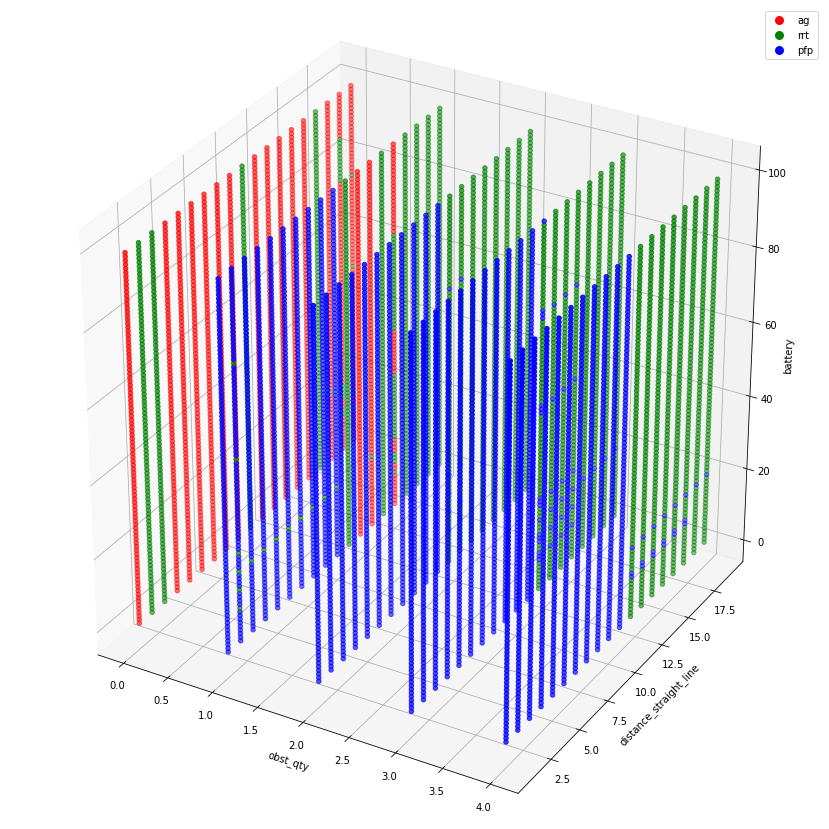

In [9]:
# Extracting data for plotting
xs, ys, zs, colors = zip(*planners)

# Map the result to a color
color_map = {
    'ag': 'r',
    'rrt': 'g',
    'pfp': 'b'  # Add other categories if you have more
}
colors = [color_map[color] for color in colors]

# Plotting
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=colors, marker='o')
ax.set_box_aspect([1, 1, 1])  

ax.set_ylabel('distance_straight_line')
ax.set_xlabel('obst_qty')
ax.set_zlabel('battery')

# Creating custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[key], markersize=10, label=key) for key in color_map]
ax.legend(handles=legend_elements)

plt.show()

In [13]:
planners[50]

(0, 1, 51, 'ag')